### 构造神经网络模型对两条曲线数据点进行二分类，详细信息参考博客
https://huizhuzhao.github.io/2017/01/16/neural-networks-manifolds-topology.html

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from jupyter_notebook.datasets.utils.data_utils import one_hot_transformer
from jupyter_notebook.datasets.base import Dataset
from jupyter_notebook.models.utils.training import train_model_keras

Using TensorFlow backend.


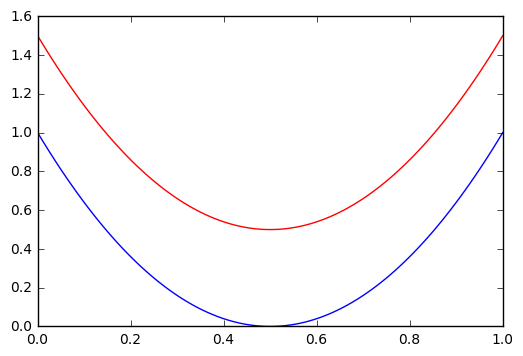

In [2]:
class QuadraticImporter():
    def __init__(self):
        pass
    
    def load_dataset(self):
        x = np.linspace(0, 1, 100)
        y1 = (2*(x-0.5))**2
        y2 = (2*(x-0.5))**2 + 0.5
    
        X_1 = np.c_[x, y1]    
        X_2 = np.c_[x, y2]
        y_1 = one_hot_transformer(np.ones_like(x), 2)
        y_2 = one_hot_transformer(np.zeros_like(x), 2)

        data = np.concatenate([X_1, X_2], axis=0)
        labels = np.concatenate([y_1, y_2], axis=0)
        self.data = [data]
        self.labels = labels
    
    def output(self):
        return self.data, self.labels

data_importer = QuadraticImporter()
dataset = Dataset()
dataset.load_importer(data_importer)
X, y = dataset.data[0], dataset.labels
plt.plot(X[:100, 0], X[:100, 1])
plt.plot(X[100:, 0], X[100:, 1], 'r')
plt.show()

In [21]:
def build_model():
    model = Sequential()
    model.add(Dense(output_dim=2, input_shape=(2, ), activation='tanh')) # changing output_dim, you test different model
    model.add(Dense(output_dim=3, activation='relu'))
    model.add(Dense(output_dim=2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def visualize_model(model, x_min, x_max, y_min, y_max, h):
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    zz = model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = np.reshape(zz.argmax(axis=1), xx.shape)
    
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y.argmax(axis=1), cmap=plt.cm.coolwarm)
    plt.show()

In [22]:
model = build_model()
print X.shape, y.shape
print model.input_shape, model.output_shape

(200, 2) (200, 2)
(None, 2) (None, 2)


In [23]:
nb_batches=150; nb_epoch=30
batch_x, batch_y = dataset.next()
print [x.shape for x in dataset.data]
loss_metrics_dict = train_model_keras(model, train_dataset=dataset, nb_epoch=nb_epoch, nb_batches=nb_batches)

[(200, 2)]
0/30, train: [ 0.68771011  0.5       ], valid: []
1/30, train: [ 0.65464175  0.69999999], valid: []
2/30, train: [ 0.60738444  0.76999998], valid: []
3/30, train: [ 0.56285042  0.80500001], valid: []
4/30, train: [ 0.53087187  0.83499998], valid: []
5/30, train: [ 0.50735915  0.83999997], valid: []
6/30, train: [ 0.49017847  0.85000002], valid: []
7/30, train: [ 0.47772226  0.82499999], valid: []
8/30, train: [ 0.46797904  0.80000001], valid: []
9/30, train: [ 0.45976922  0.80000001], valid: []
10/30, train: [ 0.45303491  0.80000001], valid: []
11/30, train: [ 0.44736138  0.79000002], valid: []
12/30, train: [ 0.44227883  0.79500002], valid: []
13/30, train: [ 0.43806061  0.77999997], valid: []
14/30, train: [ 0.43374678  0.76999998], valid: []
15/30, train: [ 0.42923194  0.79000002], valid: []
16/30, train: [ 0.42525065  0.81      ], valid: []
17/30, train: [ 0.42098656  0.80000001], valid: []
18/30, train: [ 0.41649833  0.80000001], valid: []
19/30, train: [ 0.41162965  0.

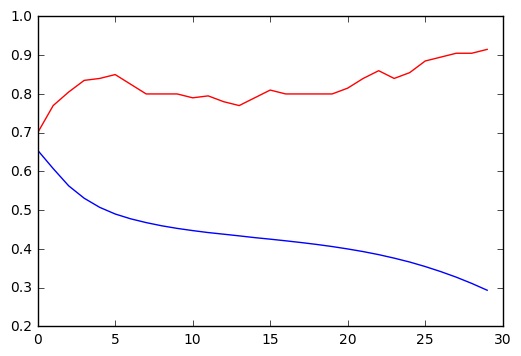

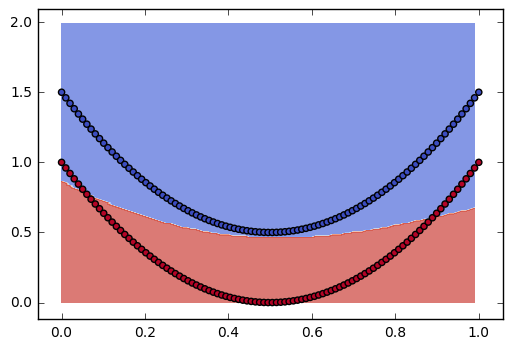

In [24]:
loss_metrics = loss_metrics_dict['train_loss_metrics']
loss_list = [x[0] for x in loss_metrics]
metrics_list = [x[1] for x in loss_metrics]
plt.plot(loss_list)
plt.plot(metrics_list, 'r')
plt.show()
visualize_model(model, 0, 1, 0, 2, 0.01)